# Final Project Part B (100 points - Due on Tuesday December 13th by 11:00 pm ET)
The output of this assignment for submission should be in PDF format AND .py or .ipynb. The name of the file should be as follows: Lastname_Firstname_Final_PartB.pdf (example: Thomas_Sunela_Final_PartB.pdf) AND Lastname_Firstname_Final_PartB.ipynb (example: Thomas_Sunela_Final_PartB.ipynb. In short, you are submitting the python notebook as well as the pdf of that notebook. Make sure your PDF file displays the visuals (if any) prior to submitting.

Incorrect file name, file type and PDF not displaying visuals (if any required) will cost you points!
Instructions for converting a Jupyter Python notebook to PDF: Go to the menu and choose, File --> Download As --> html

Open that html file and print it to PDF.

Use the YELP dataset provided in the shared google drive at: https://drive.google.com/drive/folders/1AAGizX5MzcnM8apuukUYg-37tUH4dz2P?usp=sharing (you can only access this dataset using your UMBC email address)

## Yelp Data

For the final project, you will analyze data that has been made publicly available for educational and academic purposes. The data contains 3 main tables we will analyze:

  + `yelp_academic_dataset_business.csv` - contains information about  a subset of businesses having at least one Yelp review. Every distinct business has a unique `business_id`
  
  + `yelp_academic_dataset_review.csv` - contains a subset of Yelp reviews with a `business_id` indicating what business the review is for and a `user_id` to identify the user leaving the review
  
  + `yelp_academic_dataset_user.csv` - contains a subset of Yelp users identified by `user_id`
   
## What you need to do

Your goal in this notebook is to work through the problems below to perform some brief analyses of the `yelp_academic_dataset_business.csv` data. 

As always, it can be useful to document your thoughts, strategy, and assumptions as you go. If you are stuck on a particular problem, write down what you are trying to do and why you think you may be getting stuck.

## Setup - Run the following code to get started

In [1]:
# Options to display more rows and columns
# DO NOT REMOVE

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

In [2]:
# Load the libraries you need...

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data

business_data = pd.read_csv(r'yelp_academic_dataset_business.csv')
business_data.head()

,address,attributes,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience,attributes.BYOB,attributes.BYOBCorkage,attributes.BestNights,attributes.BikeParking,attributes.BusinessAcceptsBitcoin,attributes.BusinessAcceptsCreditCards,attributes.BusinessParking,attributes.ByAppointmentOnly,attributes.Caters,attributes.CoatCheck,attributes.Corkage,attributes.DietaryRestrictions,attributes.DogsAllowed,attributes.DriveThru,attributes.GoodForDancing,attributes.GoodForKids,attributes.GoodForMeal,attributes.HairSpecializesIn,attributes.HappyHour,attributes.HasTV,attributes.Music,attributes.NoiseLevel,attributes.Open24Hours,attributes.OutdoorSeating,attributes.RestaurantsAttire,attributes.RestaurantsCounterService,attributes.RestaurantsDelivery,attributes.RestaurantsGoodForGroups,attributes.RestaurantsPriceRange2,attributes.RestaurantsReservations,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.Smoking,attributes.WheelchairAccessible,attributes.WiFi,business_id,categories,city,hours,hours.Friday,hours.Monday,hours.Saturday,hours.Sunday,hours.Thursday,hours.Tuesday,hours.Wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,average,NaN,False,casual,NaN,False,True,2.0,True,NaN,True,NaN,NaN,NaN,Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,NaN,11:0-21:0,8:30-17:0,11:0-21:0,NaN,11:0-21:0,11:0-21:0,11:0-21:0,1,51.091813,-114.031675,Minhas Micro Brewery,NaN,T2E 6L6,24,4.0,AB
1,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN,False,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,True,NaN,NaN,NaN,True,False,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,False,NaN,NaN,NaN,True,casual,NaN,False,True,2.0,False,False,True,NaN,True,no,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,NaN,17:0-23:0,NaN,17:0-23:0,17:0-23:0,NaN,NaN,NaN,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV
2,1335 rue Beaubien E,NaN,NaN,NaN,beer_and_wine,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,False,"{'garage': False, 'street': False, 'validated'...",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,True,NaN,average,NaN,False,casual,NaN,False,True,2.0,True,True,False,NaN,NaN,free,O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,NaN,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,33.449999,-112.076979,Geico Insurance,NaN,85003,8,1.5,AZ
4,2005 Alyth Place SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,NaN,8:0-17:0,8:0-17:0,NaN,NaN,8:0-17:0,8:0-17:0,8:0-17:0,1,51.035591,-114.027366,Action Engine,NaN,T2H 0N5,4,2.0,AB


## Task Set #1 - Explore and Clean

### Problem 1: (5 points)

<span  style="color:purple; font-size:16px">The `yelp_academic_dataset_business.csv` data has been loaded for you as a Pandas DataFrame called `business_data`. Determine the  number of rows and columns of the data. **Is the data in a tidy format? Briefly explain your reasoning about why you think the data is/is not tidy.**</span>

In [4]:
# Your code here
business_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 61 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   address                                180970 non-null  object 
 1   attributes                             0 non-null       float64
 2   attributes.AcceptsInsurance            11671 non-null   object 
 3   attributes.AgesAllowed                 397 non-null     object 
 4   attributes.Alcohol                     47892 non-null   object 
 5   attributes.Ambience                    47577 non-null   object 
 6   attributes.BYOB                        911 non-null     object 
 7   attributes.BYOBCorkage                 1409 non-null    object 
 8   attributes.BestNights                  6844 non-null    object 
 9   attributes.BikeParking                 84891 non-null   object 
 10  attributes.BusinessAcceptsBitcoin      12674 non-null   

In [5]:
business_data.tail(2)

,address,attributes,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience,attributes.BYOB,attributes.BYOBCorkage,attributes.BestNights,attributes.BikeParking,attributes.BusinessAcceptsBitcoin,attributes.BusinessAcceptsCreditCards,attributes.BusinessParking,attributes.ByAppointmentOnly,attributes.Caters,attributes.CoatCheck,attributes.Corkage,attributes.DietaryRestrictions,attributes.DogsAllowed,attributes.DriveThru,attributes.GoodForDancing,attributes.GoodForKids,attributes.GoodForMeal,attributes.HairSpecializesIn,attributes.HappyHour,attributes.HasTV,attributes.Music,attributes.NoiseLevel,attributes.Open24Hours,attributes.OutdoorSeating,attributes.RestaurantsAttire,attributes.RestaurantsCounterService,attributes.RestaurantsDelivery,attributes.RestaurantsGoodForGroups,attributes.RestaurantsPriceRange2,attributes.RestaurantsReservations,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.Smoking,attributes.WheelchairAccessible,attributes.WiFi,business_id,categories,city,hours,hours.Friday,hours.Monday,hours.Saturday,hours.Sunday,hours.Thursday,hours.Tuesday,hours.Wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
188591,7601 Scott Padgett Pkwy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,free,3_fIsSxN2RBovQ_6EFtLzA,"Event Planning & Services, Hotels & Travel, Ho...",Concord,NaN,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,1,35.364366,-80.703454,Residence Inn Charlotte Concord,NaN,28027,19,4.0,NC
188592,"3900 Paradise Rd, Ste R",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,"{'garage': False, 'street': False, 'validated'...",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,"{'coloring': True, 'africanamerican': True, 'c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,True,NaN,NkOvIueadjFUxeCyq_uQEw,"Makeup Artists, Men's Clothing, Swimwear, Shop...",Las Vegas,NaN,11:0-19:0,NaN,11:0-19:0,NaN,11:0-19:0,11:0-19:0,11:0-19:0,1,36.118697,-115.154269,Tito Jimy Salon and Boutique,Eastside,89169,8,4.0,NV


#### Written Answer:

*{Type your answer here}*

##### The business_data dataset has the below Number of rows and columns
- Rows - 188593 
- Columns - 61 

### Problem 2: (5 points)

<span  style="color:purple; font-size:16px">Determine the number of columns of each data type in `business_data`: object, float64, int64. </span>

In [6]:
# Your code here
print('Number of columns of each data type in business_data:')
business_data.dtypes.value_counts()

Number of columns of each data type in business_data:


object     53
float64     6
int64       2
dtype: int64

### Problem 3: (5 points)

<span  style="color:purple; font-size:16px">Create a Pandas Series containing the proportion of missing values in each column of `business_data`.</span>

In [7]:
# Your code here
missing_proportion = business_data.isnull().mean()
print('Proportion of Missing values in each column of business_data:')
missing_proportion

Proportion of Missing values in each column of business_data:


address                                  0.040420
attributes                               1.000000
attributes.AcceptsInsurance              0.938115
attributes.AgesAllowed                   0.997895
attributes.Alcohol                       0.746056
attributes.Ambience                      0.747727
attributes.BYOB                          0.995169
attributes.BYOBCorkage                   0.992529
attributes.BestNights                    0.963710
attributes.BikeParking                   0.549872
attributes.BusinessAcceptsBitcoin        0.932797
attributes.BusinessAcceptsCreditCards    0.255587
attributes.BusinessParking               0.451602
attributes.ByAppointmentOnly             0.759148
attributes.Caters                        0.787702
attributes.CoatCheck                     0.954765
attributes.Corkage                       0.996516
attributes.DietaryRestrictions           0.999268
attributes.DogsAllowed                   0.927458
attributes.DriveThru                     0.964187


In [8]:
missing_proportion.columns = ['Columns','Missing Proportion']

In [9]:
missing_proportion.columns

['Columns', 'Missing Proportion']

In [10]:
missing_proportion

address                                  0.040420
attributes                               1.000000
attributes.AcceptsInsurance              0.938115
attributes.AgesAllowed                   0.997895
attributes.Alcohol                       0.746056
attributes.Ambience                      0.747727
attributes.BYOB                          0.995169
attributes.BYOBCorkage                   0.992529
attributes.BestNights                    0.963710
attributes.BikeParking                   0.549872
attributes.BusinessAcceptsBitcoin        0.932797
attributes.BusinessAcceptsCreditCards    0.255587
attributes.BusinessParking               0.451602
attributes.ByAppointmentOnly             0.759148
attributes.Caters                        0.787702
attributes.CoatCheck                     0.954765
attributes.Corkage                       0.996516
attributes.DietaryRestrictions           0.999268
attributes.DogsAllowed                   0.927458
attributes.DriveThru                     0.964187


<span  style="color:purple; font-size:16px">How many variables have no missing values?</span>

In [23]:
# Your code here
missing_values_count = business_data.isna().sum()
missing_values_count

address                   7623
attributes_happyhour    179308
business_id                  0
categories                 541
city                        10
hours                   188593
hours_friday             46797
hours_monday             55832
hours_saturday           63217
hours_sunday             95206
hours_thursday           46234
hours_tuesday            47986
hours_wednesday          46750
is_open                      0
latitude                     6
longitude                    6
name                         0
neighborhood            119938
postal_code                681
review_count                 0
stars                        0
state                        0
dtype: int64

In [35]:
print('Number of Variables having No Missing Values:', missing_values_count[missing_values_count == 0].count())

Number of Variables having No Missing Values: 6


### Problem 4: (5 points)

<span  style="color:purple; font-size:16px">Use an appropriate visualization technique to analyze the missingness in `business_data`.</span>

In [12]:
# Use a heatmap, pointplot, or other appropriate visualization here

<AxesSubplot:>

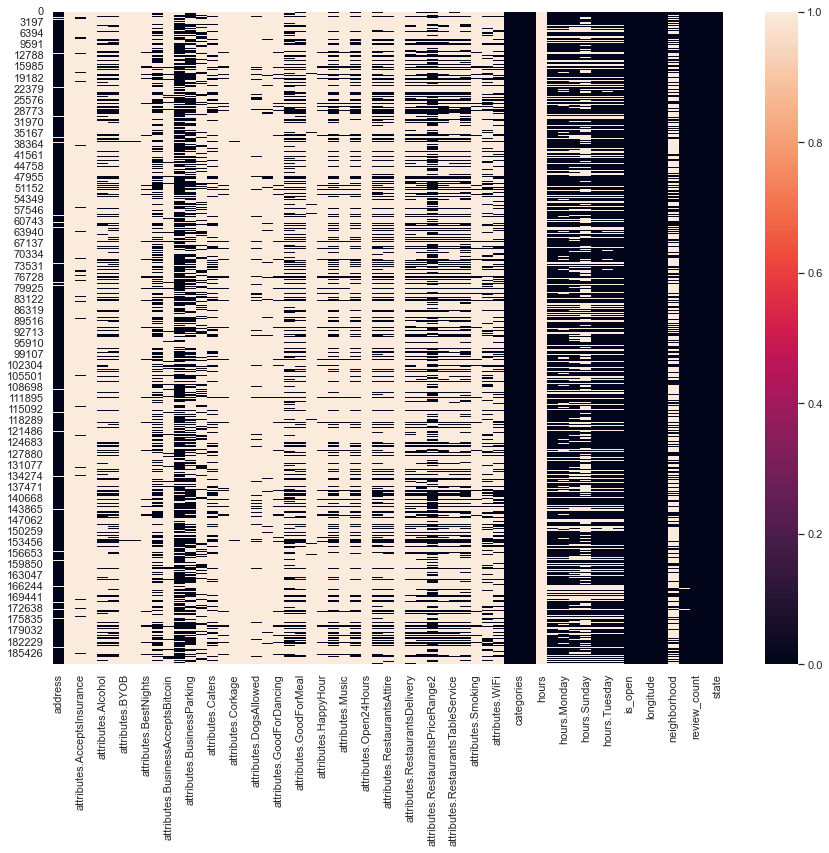

In [13]:
#Heatmap to analyze the missingness in business_data
sns.set (rc = {'figure.figsize':(15, 12)})
sns.heatmap(business_data.isnull())

### Problem 5: (5 points)

<span  style="color:purple; font-size:16px">Drop all columns that contain **only missing values** from `business_data`.</span>

In [14]:
# Your code here
business_data.dropna(axis='columns')

,business_id,is_open,name,review_count,stars,state
0,Apn5Q_b6Nz61Tq4XzPdf9A,1,Minhas Micro Brewery,24,4.0,AB
1,AjEbIBw6ZFfln7ePHha9PA,0,CK'S BBQ & Catering,3,4.5,NV
2,O8S5hYJ1SMc8fA4QBtVujA,0,La Bastringue,5,4.0,QC
3,bFzdJJ3wp3PZssNEsyU23g,1,Geico Insurance,8,1.5,AZ
4,8USyCYqpScwiNEb58Bt6CA,1,Action Engine,4,2.0,AB
...,...,...,...,...,...,...
188588,sMQAZ3DkfrURFoJAyOhjEw,0,Ross Massage,9,2.5,PA
188589,6hvuCibNS4uECetHb9MCQQ,1,Four Seasons Boutique,5,2.0,PA
188590,KleCXFYOmdACcQUvf6_XEg,1,Walmart Supercenter,26,3.0,NC
188591,3_fIsSxN2RBovQ_6EFtLzA,1,Residence Inn Charlotte Concord,19,4.0,NC


### Problem 6: (5 points)

<span  style="color:purple; font-size:16px">The `business_data` is not in a form that is convenient for analysis. Let's begin by cleaning up the variable names. </span>

Tasks:

1. Make all column names lowercase.
1. Replace all periods `.` with an underscore _

In [15]:
business_data.columns

Index(['address', 'attributes', 'attributes.AcceptsInsurance', 'attributes.AgesAllowed',
       'attributes.Alcohol', 'attributes.Ambience', 'attributes.BYOB', 'attributes.BYOBCorkage',
       'attributes.BestNights', 'attributes.BikeParking', 'attributes.BusinessAcceptsBitcoin',
       'attributes.BusinessAcceptsCreditCards', 'attributes.BusinessParking',
       'attributes.ByAppointmentOnly', 'attributes.Caters', 'attributes.CoatCheck',
       'attributes.Corkage', 'attributes.DietaryRestrictions', 'attributes.DogsAllowed',
       'attributes.DriveThru', 'attributes.GoodForDancing', 'attributes.GoodForKids',
       'attributes.GoodForMeal', 'attributes.HairSpecializesIn', 'attributes.HappyHour',
       'attributes.HasTV', 'attributes.Music', 'attributes.NoiseLevel', 'attributes.Open24Hours',
       'attributes.OutdoorSeating', 'attributes.RestaurantsAttire',
       'attributes.RestaurantsCounterService', 'attributes.RestaurantsDelivery',
       'attributes.RestaurantsGoodForGroups', 

In [16]:
# Your code here

# Make all column names lowercase
business_data.columns= business_data.columns.str.lower()
business_data.columns

Index(['address', 'attributes', 'attributes.acceptsinsurance', 'attributes.agesallowed',
       'attributes.alcohol', 'attributes.ambience', 'attributes.byob', 'attributes.byobcorkage',
       'attributes.bestnights', 'attributes.bikeparking', 'attributes.businessacceptsbitcoin',
       'attributes.businessacceptscreditcards', 'attributes.businessparking',
       'attributes.byappointmentonly', 'attributes.caters', 'attributes.coatcheck',
       'attributes.corkage', 'attributes.dietaryrestrictions', 'attributes.dogsallowed',
       'attributes.drivethru', 'attributes.goodfordancing', 'attributes.goodforkids',
       'attributes.goodformeal', 'attributes.hairspecializesin', 'attributes.happyhour',
       'attributes.hastv', 'attributes.music', 'attributes.noiselevel', 'attributes.open24hours',
       'attributes.outdoorseating', 'attributes.restaurantsattire',
       'attributes.restaurantscounterservice', 'attributes.restaurantsdelivery',
       'attributes.restaurantsgoodforgroups', 

In [17]:
# Replace all periods . with an underscore _

business_data.columns= business_data.columns.str.replace('.', '_')
business_data.columns

/var/folders/4w/0z1hsmc17gq8cf0vjq9jxmrw0000gn/T/ipykernel_3514/2027581329.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  business_data.columns= business_data.columns.str.replace('.', '_')


Index(['address', 'attributes', 'attributes_acceptsinsurance', 'attributes_agesallowed',
       'attributes_alcohol', 'attributes_ambience', 'attributes_byob', 'attributes_byobcorkage',
       'attributes_bestnights', 'attributes_bikeparking', 'attributes_businessacceptsbitcoin',
       'attributes_businessacceptscreditcards', 'attributes_businessparking',
       'attributes_byappointmentonly', 'attributes_caters', 'attributes_coatcheck',
       'attributes_corkage', 'attributes_dietaryrestrictions', 'attributes_dogsallowed',
       'attributes_drivethru', 'attributes_goodfordancing', 'attributes_goodforkids',
       'attributes_goodformeal', 'attributes_hairspecializesin', 'attributes_happyhour',
       'attributes_hastv', 'attributes_music', 'attributes_noiselevel', 'attributes_open24hours',
       'attributes_outdoorseating', 'attributes_restaurantsattire',
       'attributes_restaurantscounterservice', 'attributes_restaurantsdelivery',
       'attributes_restaurantsgoodforgroups', 

In [18]:
business_data

,address,attributes,attributes_acceptsinsurance,attributes_agesallowed,attributes_alcohol,attributes_ambience,attributes_byob,attributes_byobcorkage,attributes_bestnights,attributes_bikeparking,attributes_businessacceptsbitcoin,attributes_businessacceptscreditcards,attributes_businessparking,attributes_byappointmentonly,attributes_caters,attributes_coatcheck,attributes_corkage,attributes_dietaryrestrictions,attributes_dogsallowed,attributes_drivethru,attributes_goodfordancing,attributes_goodforkids,attributes_goodformeal,attributes_hairspecializesin,attributes_happyhour,attributes_hastv,attributes_music,attributes_noiselevel,attributes_open24hours,attributes_outdoorseating,attributes_restaurantsattire,attributes_restaurantscounterservice,attributes_restaurantsdelivery,attributes_restaurantsgoodforgroups,attributes_restaurantspricerange2,attributes_restaurantsreservations,attributes_restaurantstableservice,attributes_restaurantstakeout,attributes_smoking,attributes_wheelchairaccessible,attributes_wifi,business_id,categories,city,hours,hours_friday,hours_monday,hours_saturday,hours_sunday,hours_thursday,hours_tuesday,hours_wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,average,NaN,False,casual,NaN,False,True,2.0,True,NaN,True,NaN,NaN,NaN,Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,NaN,11:0-21:0,8:30-17:0,11:0-21:0,NaN,11:0-21:0,11:0-21:0,11:0-21:0,1,51.091813,-114.031675,Minhas Micro Brewery,NaN,T2E 6L6,24,4.0,AB
1,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN,False,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,True,NaN,NaN,NaN,True,False,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,False,NaN,NaN,NaN,True,casual,NaN,False,True,2.0,False,False,True,NaN,True,no,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,NaN,17:0-23:0,NaN,17:0-23:0,17:0-23:0,NaN,NaN,NaN,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV
2,1335 rue Beaubien E,NaN,NaN,NaN,beer_and_wine,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,False,"{'garage': False, 'street': False, 'validated'...",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,True,NaN,average,NaN,False,casual,NaN,False,True,2.0,True,True,False,NaN,NaN,free,O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,NaN,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,33.449999,-112.076979,Geico Insurance,NaN,85003,8,1.5,AZ
4,2005 Alyth Place SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,NaN,8:0-17:0,8:0-17:0,NaN,NaN,8:0-17:0,8:0-17:0,8:0-17:0,1,51.035591,-114.027366,Action Engine,NaN,T2H 0N5,4,2.0,AB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188588,"8000 McKnight Rd, Ste 570",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,sMQAZ3DkfrURF

### Problem 7: (5 points)

<span  style="color:purple; font-size:16px">Let's now get rid of columns that we don't need right now. Perform the following transformation steps to the data.</span>

1. Drop all `attribute_*` columns except for the `attributes_happyhour` column.
1. Create a new column, called `open_on_weekends`, that is a 1 if the business is open on the weekend (has a non-null value for either `hours_saturday` or `hours_sunday`) and 0 otherwise.
1. Drop all of the `hours_*` columns after creating the `open_on_weekends` column.

In [19]:
# Drop all of the unwanted attributes columns

In [20]:
# Droping all attribute_* columns except for the attributes_happyhour column using regex 'filter' and 'difference'
business_data = business_data.drop(business_data.filter(regex='attributes_*').columns.difference(['attributes_happyhour']), axis=1)

In [21]:
business_data.columns

Index(['address', 'attributes_happyhour', 'business_id', 'categories', 'city', 'hours',
       'hours_friday', 'hours_monday', 'hours_saturday', 'hours_sunday', 'hours_thursday',
       'hours_tuesday', 'hours_wednesday', 'is_open', 'latitude', 'longitude', 'name',
       'neighborhood', 'postal_code', 'review_count', 'stars', 'state'],
      dtype='object')

In [22]:
# Create open_on_weekends
open_weekend = []
for i in business_data:
    if business_data['hours_saturday'].isna().values[0] == True:
        open_weekend.append(1) 
    else:
        open_weekend.append(0)

business_data['open_on_weekends'] = open_weekend

ValueError: Length of values (22) does not match length of index (188593)

In [ ]:
rating = []
    for row in df['hours_saturday']:
        if row < 1.0 :    rating.append('AA')
        elif row < 2.0:   rating.append('A')
        elif row < 3.0:  rating.append('BB')
        elif row < 4.0:  rating.append('B')
        elif row < 5.0:  rating.append('C')
        
        else:           rating.append('Not_Rated')

In [ ]:
business_data['hours_saturday'].isna().item() == True

# Remove hours.* columns
business_data = business_data.drop(business_data.filter(regex='hours_*').columns, axis=1)
business_data.columns

### Problem 8: (5 points)

<span  style="color:purple; font-size:16px">Create a Pandas Series containing the proportion of business in the data by state. (For now, a *state* refers to any level of the `state` variable, not only states in the U.S.A.)</span>

In [ ]:
# Number of businesses by state


<span  style="color:purple; font-size:16px">How many unique states are represented in the data? Are all of them in the United States of America? Do all of the levels of `state` make sense?</span>

#### Written Answer:

*{Type your answer here}*



### Problem 9: (5 points)

<span  style="color:purple; font-size:16px">These data are fairly large! Let's focus on the data from a few key states. The goal in this exercise is to subset `business_data` to only contain businesses in the 5 states having the largest total number of businesses in the state. (Again, *state* does not need to correspond to a state in the U.S.A. but simply refers to a level of the `state` column.)</span>

Tasks:

1. Extract the 5 states from `state_counts` with the largest number of businesses
2. Subset `business_data` to only contain observations from these top-5 states

In [ ]:
# Your code here


### Problem 10:  (5 points)

<span  style="color:purple; font-size:16px">Import the `territory_abbr.csv` data which contains a record for every U.S. state and territory. Use this data to **remove** businesses outside of the United States *by* performing an appropriate **merge** with `business_data`. Assign the remaining data to a DataFrame called `business_data_subset`.</span>

(Of course...you could probably figure out what state(s) need to be removed just by looking at them. The point is to demonstrate that you can use `merge()` and any necessary arguments to accomplish the task. Also...don't mess up your tidy data! Though not necessary for full credit, you may want to remove/modify columns that are not lowercase.)

In [ ]:
# Read in data

us_data = pd.read_csv('territory_abbr.csv')
us_data.columns= us_data.columns.str.lower()
us_data

In [ ]:
us_data.info()

In [ ]:
business_data.head()

In [ ]:
business_data.info()

In [ ]:
business_data_subset=pd.merge(us_data, business_data, left_on='abbreviation', right_on='state', how='inner')
business_data_subset

<span  style="color:purple; font-size:16px">How many unique U.S. states are left in the data?</span>

In [ ]:
# Your code here
business_data_subset.abbreviation.unique()

In [ ]:
print('Number of unique U.S. states in business_data_subset:')
business_data_subset.abbreviation.unique().size

## Task Set #2 - Analysis

---

### Problem 11: (5 points)

<span  style="color:purple; font-size:16px">Do businesses with more reviews tend to have higher ratings? </span> 

<span  style="color:purple; font-size:16px">To help answer this question, use `business_data` to create *side-by-side notched boxplots* to visualize the relationship between the number of reviews left for the business (`review_count`, y-axis) and the rating of the business (`stars`, x-axis).</span> 
    
<span  style="color:purple; font-size:16px">**Note: use `ax.set_yscale('log')` to set the scale of the y-axis to be logarithmic due to extreme variation in the number of reviews left for the businesses. This means you must specify a figure and axes object using `fig, ax = plt.subplots(figsize=(10, 10))`**</span>
    
<span>Make sure to use appropriate axes labels and include an appropriate title. Make the figure 10 units tall and 10 units wide.</span>

In [ ]:
# Your code here
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style("whitegrid")
ax.set_yscale('log')
ax = sns.boxplot(x="stars", y="review_count", data=business_data)
ax.set_xlabel('Stars')
ax.set_ylabel('Review Count')
ax.set_title('Business Ratings on Review Count ')
plt.show()

<span  style="color:purple; font-size:16px">Describe what you see in the plot and formulate a hypothesis about why the relationship between these variables looks the way it does.</span>

#### Written Answer:

*{Type your answer here}*



### Problem 12: (5 points)

<span  style="color:purple; font-size:16px">The `categories` column of `business_data_subset` contains a *comma separated* list of various keyword categories for each business. Use an appropriate Python data structure to iterate over every row of the data and determine all of the unique categories as well as the number of times each category appears, sorted from most common category to least common category.</span>

Your result should look like the following:

<pre>
Restaurants                  234
Shopping                     173
Home Services                132
Food                         120
Health & Medical              92
.
.
.

In [ ]:
business_data_subset.head(2)

In [ ]:
# Your code here

business_data_subset.categories.value_counts()

for i in range(len(business_data_subset)):
  
    s = business_data_subset.loc[i, "categories"]
    f= set(s.to_string().split(','))
    
    #ls
    #l=len(s)  
    #print(s,l)

In [ ]:
s = pd.value_counts(df.Account_Type)
s1 = pd.Series({'nunique': len(s), 'unique values': s.index.tolist()})
s.append(s1)
ls = s.split(",")
s=set(string)  #Creates a set of Unique Un-Ordered Elements
l=len(s)       #It returns the length of the above set.
print('Unique words:',l)

<span  style="color:purple; font-size:16px">How many distinct categories are in `business_data_subset`?</span>

In [ ]:
# Number of distinct categories equal to the number of rows



### Problem 13: (5 points)

<span  style="color:purple; font-size:16px">For this question, we want to see if we can use the `categories` variable from the `business_data_subset` table to extract the records belonging to **food establishments** - any place that someone could go to get a freshly prepared meal.</span>

<span  style="color:purple; font-size:16px">Create a copy of the Pandas DataFrame called `food_establishments` which contains all business in `business_data_subset` that contain either *dining* or *restaurant* in their list of categories. (Make sure to ignore case.) How many food establishments are captured using this method?</span>

Hint: This can be accomplished in at least two ways. No reasonable method is bad! Create a new variable and use it to filter observations or directly subset the data. Your choice!

In [ ]:
# Your code here


### Problem 14: (5 points)

<span  style="color:purple; font-size:16px">Using the `food_establishments` table, create a table with `stars` as the index, `state` as the columns, and the conditional `stars` distribution of food establishments for each `state` as values.</span>

<span  style="color:purple; font-size:16px">Include the marginal `stars` distribution in your table by using the appropriate `margins` argument. Create a valid conditional `stars` distribution for each state using the `normalize = 'columns'` argument.</span>

You can check that you have successfully create valid conditional `stars` distributions for each state by verifying each column sums to 1. 

Your final table should look similar to the table below with the appropriate values imputed for `val`.

| state  	|  AZ 	| NV  	| NC  	| OH  | All |
|---	|---	|---	|---	|---  |---  |
|   stars 	|
|   1 	|   val	|  val 	|  val 	| val   | val    |
|   1.5	|   val	|  val	|  val 	| val   | val    |
|   2	|   val	|  val 	|  val 	| val   | val    |
|   2.5	|   val	|  val	|  val 	| val   | val    |
|   3	|   val	|  val 	|  val 	| val   | val    |
|   3.5	|   val	|  val	|  val 	| val   | val    |
|   4	|   val	|  val 	|  val 	| val   | val    |
|   4.5	|   val	|  val 	|  val 	| val   | val    |
|   5	|   val	|  val 	|  val 	| val   | val    |

In [ ]:
# Your code here


### Problem 15: (5 points)

<span  style="color:purple; font-size:16px">Is there a difference in the rating distribution (`stars`) of food establishments by state?</span>

<span  style="color:purple; font-size:16px">Use the table you created in the previous problem to create an appropriate visualization that helps you to answer the above question.</span>

In [ ]:
# Your code here


### Problem 16: (5 points)

<span  style="color:purple; font-size:16px">Using the `food_establishments` data, calculate the *median*, *mean*, *standard deviation*, *minimum*, *maximum*, and *number of observations* for food establishments with/without a *Happy Hour* by using the `attributes_happyhour` variable.</span>

In [ ]:
# Your code here


<span  style="color:purple; font-size:16px">Describe any differences you find for food establishments having a *Happy Hour* and those that do not. Do food establishments with a happy hour seem to typically be higher or lower rated than food establishments without a happy hour? Do most food establishments offer a happy hour?</span>

#### Written Answer:

*{Type your answer here}*



---

## Task Set #3 Wrapping up

In this section of the Final Project, you will be focused on analyzing the Yelp users and the reviews they leave. Unlike the previous part, you will not be guided through each step and must decide how best to proceed.

Your analyses will involve the following 3 tables:

+ `yelp_academic_dataset_review.csv` - contains a subset of Yelp reviews with a `business_id` indicating what business the review is for and a `user_id` to identify the user leaving the review.

+ `yelp_academic_dataset_user.csv` - contains a subset of Yelp users identified by `user_id`

+ `yelp_academic_dataset_business.csv` - contains information about a subset of businesses having at least one Yelp review and every distinct business has a unique `business_id`. 


### Problem 17: Time Based Analysis (10 points)

<span  style="color:purple; font-size:16px">The `review_data` table contains a column `date` representing the date the review was created.</span>

Chose **ONE** of the questions below and use the `review_data` to answer.

1. Are more reviews posted during certain days of the week? What about certain months of the year? What patterns can you find about when reviews are posted? Draw a suitable plot.

1. Do reviews made on certain days of the week or certain months of the year tend to be higher/lower rated? What relationship can you find between the `stars` ratings of a review and when the reviews was posted? Draw a suitable plot.

In [ ]:
# Your code here


<span  style="color:purple; font-size:16px">Provide a brief explanation of your conclusions.</span>

#### Written Answer:

*{Type your answer here}*



### Problem 18: Text Based Analysis (10 points)

<span  style="color:purple; font-size:16px">The `review_data` table contains a column `text` containing the full text of the review. Use these data to answer one of the questions below.</span>

Chose **ONE** of the questions below and use the `review_data` to answer.

1. Can you classify a review as having a *positive* or *negative* sentiment? If so, select five particular businesses (by `business_id`) and compare the business's average `stars` rating from the `business_data` to the proportion of reviews you have identified as having `positive` or `negative` sentiment for those particular businesses. Draw a suitable plot.

1. Do reviews with exclamation points seem to be either very highly rated or very low rated? Determine the `stars` distribution as a function of the number of exclamation points used in the review. Draw a suitable plot.


In [ ]:
# Your code here


<span  style="color:purple; font-size:16px">Provide a brief explanation of your conclusions.</span>

#### Written Answer:

*{Type your answer here}*

